In [6]:
from bs4 import BeautifulSoup
import requests
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def getSoup(url: str) -> BeautifulSoup:
    page = requests.get(url)
    bs = BeautifulSoup(page.content, "html.parser")
    page.close()
    
    return bs


page = f'https://www.nutrition-charts.com/panera-bread-nutrition-facts-calorie-information/'

soup = getSoup(page)

In [7]:
allTabes = soup.find_all('tbody')

headers = [x.text for x in allTabes[0].find_all('th')]

calIdx = 0
sugIdx = 0
xString = "Sodium"
for i in range(len(headers)):
    if xString in headers[i]:
        calIdx = i + 2
    elif "Weight" in headers[i]:
        sugIdx = i + 2



In [8]:

foodSects = []
for tabe in allTabes:
    foodSects.append(tabe.find_all('tr'))

allCals = []
allSugs = []


for tabe in foodSects:
    for i in range(1, len(tabe)):
        if len(tabe[i]) > sugIdx:
            allCals.append(float(tabe[i].find_all('td')[calIdx].text))
            allSugs.append(float(tabe[i].find_all('td')[sugIdx].text))

#for i in range(len(allCals)):
#    print("Calories: " + str(allCals[i]) + "    Sugar: " + str(allSugs[i]))

Text(0.5, 1.0, 'Sodium vs Weight Watcher Points in Panera Food')

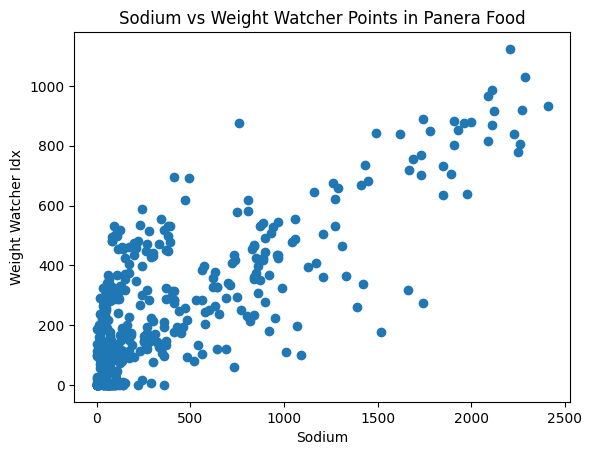

In [9]:
plt.scatter(allCals, allSugs)
plt.xlabel(xString)
plt.ylabel("Weight Watcher Idx")
plt.title(xString + " vs Weight Watcher Points in Panera Food")